<a href="https://colab.research.google.com/github/git-supreetpraharaj/machine-learning-projects/blob/main/IRIS/Notebooks/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0  | Introduction to Iris classification

Iris classification involves categorizing iris flowers into distinct species based on petal and sepal measurements. It is a benchmark problem in machine learning, aiding in the development of classification algorithms and offering practical applications in botany and related fields.

Iris classification is a widely studied and well-known problem in the field of machine learning and pattern recognition. It involves the identification and categorization of iris flowers into distinct species based on certain characteristic features of their petals and sepals. The iris dataset, introduced by the British statistician and biologist Ronald Fisher in 1936, has become a benchmark dataset for evaluating the performance of various classification algorithms.

The iris dataset consists of 150 samples, each representing a different iris flower. For each sample, four measurements are recorded: the length and width of the sepals, and the length and width of the petals. These measurements serve as the input features for iris classification algorithms, and the corresponding target variable is the iris species, which can be one of three classes: setosa, versicolor, or virginica.

The challenge in iris classification lies in distinguishing between the different iris species based on the given input features. While some species may have distinct differences in their measurements, others may exhibit more subtle variations, making accurate classification a complex task. Therefore, the development of effective classification models for iris data has been of great interest in the field of machine learning, serving as a starting point for many researchers and practitioners.

Various classification algorithms have been applied to the iris dataset over the years, ranging from traditional statistical methods to more advanced machine learning techniques. These include decision trees, support vector machines, k-nearest neighbors, and neural networks, among others. Researchers often use the iris dataset as a testbed for evaluating the performance and comparing the strengths and weaknesses of different classification algorithms.

The significance of iris classification extends beyond its application as a benchmark dataset. The problem has practical implications in various domains, including botany, agriculture, and horticulture, where the accurate identification of iris species is crucial for understanding their characteristics, studying their distribution, and guiding conservation efforts. Furthermore, the study of iris classification has helped researchers gain insights into feature selection, dimensionality reduction, and generalization in machine learning.

In this era of rapid technological advancements, iris classification continues to serve as an essential problem in the field of pattern recognition, providing a foundation for developing and refining classification algorithms. The exploration and refinement of classification models on the iris dataset contribute not only to the understanding of iris species but also to the advancement of machine learning techniques that can be applied to a wide range of classification problems.

# 2.0 | Popular techniques used for Iris classfication

## 2.1 | Decision Trees

Decision tree algorithms, such as C4.5 and CART, are widely applied for iris classification. They recursively split the dataset based on feature thresholds, creating a tree-like structure that predicts the iris species based on the input features.

## 2.2 | k-Nearest Neighbors (k-NN)


The k-NN algorithm classifies iris flowers by finding the k nearest neighbors in the feature space and assigning the most common class among them to the target sample.

## 2.3 | Support Vector Machines (SVM)

SVM is a powerful algorithm for iris classification. It finds a hyperplane that optimally separates different iris species by maximizing the margin between them in the feature space.

## 2.4 | Neural Networks Multi-layer perceptron (MLP)

neural networks have been successfully applied to iris classification. They consist of interconnected layers of artificial neurons that learn to recognize patterns and make predictions based on the input features.

## 2.5 | Random Forests

Random forests combine multiple decision trees to improve classification accuracy. Each tree in the ensemble is trained on a different subset of the data, and the final prediction is made by aggregating the predictions of individual trees.

# 3.0 | Iris Classification using Neural Network

Iris classification using a neural network has proven to be a successful approach. By leveraging the power of multi-layer perceptron (MLP) models, neural networks can learn complex patterns and relationships between the iris features and species. With the input layer representing the sepal and petal measurements, and the output layer indicating the iris species, hidden layers enable the network to capture intricate characteristics. Training the neural network involves adjusting the weights and biases through backpropagation. This method allows for accurate predictions on new iris samples, making neural networks a flexible and effective tool for iris classification tasks.

## 3.1 | Download Iris dataset

1. Install the Kaggle library: Use the command `!pip install kaggle` to install the Kaggle library in your Colab environment.
2. Upload the Kaggle API token:
  - Go to your Kaggle account settings and scroll down to the API section.
  - Click on "Create New API Token" to download the kaggle.json file, which contains your API credentials.
  - In Colab, use the files.upload() function to upload your kaggle.json file.
3. Set up the Kaggle API token:
  - After uploading the kaggle.json file, load its contents.
4. Download the Iris dataset: Use the Kaggle CLI command !kaggle datasets download -d uciml/iris to download the Iris dataset from Kaggle.
5. Extract the dataset:
 - Use the zipfile library in Python to extract the downloaded dataset.
Create a zipfile.ZipFile object and pass the name of the downloaded ZIP file ('iris.zip') and the target directory where you want to extract the dataset ('iris_dataset'). 

In [ ]:
# Installing kaggle library
!pip install -q kaggle

In [ ]:
# importing libraries for token upload
# and kaggle setup
import json
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
token_file = next(iter(uploaded))
with open(token_file) as file:
    token = json.load(file)

os.environ['KAGGLE_USERNAME'] = token['username']
os.environ['KAGGLE_KEY'] = token['key']

In [ ]:
!kaggle datasets download -d uciml/iris -p /content/drive/MyDrive/Dataset/Iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 1.09MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Dataset/Iris/iris.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Dataset/Iris/iris')

## 3.2 | Load Iris Data

Iris data is present in *Iris.csv* file. To load the data we use *pandas* library.

> **Pandas** is a popular Python library for data manipulation and analysis. It provides powerful data structures, such as DataFrames, and functions for handling and manipulating structured data, making it an essential tool for tasks like data cleaning, exploration, and preprocessing in data science and analytics workflows.

In [ ]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from torchmetrics.functional import accuracy 
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import torch

In [ ]:
DATASET_PATH = '/content/drive/MyDrive/Dataset/Iris/Iris.csv'

iris_df = pd.read_csv(DATASET_PATH).set_index('Id')

## 3.3 | Data Preprocessing

### 3.3.1 | Separating Features and Labels

* The code assumes that the dataset is stored in a pandas DataFrame named iris_df.
* The `drop()` function is used to remove the "*Species*" column from the DataFrame, extracting the feature columns into `X`.
* The "*Species*" column is assigned to `y`, representing the target labels.

In [ ]:
# Separating features and labels
X, y = iris_df.drop("Species", axis=1).values, iris_df["Species"].values

### 3.3.2 | Scaling the Data:

* The `StandardScaler()` from **scikit-learn** is utilized to standardize the feature data.
* The `fit_transform()` method scales the features in `X` to have **zero mean** and **unit varianc**e.
* The scaled feature data is stored in `X_scaled`.

In [ ]:
# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.3.3 | Encoding Labels

* The `LabelEncoder()` from **scikit-learn** is employed to encode the target labels (`y`) into numerical values.
* The `fit_transform()` method fits the encoder to the target labels and transforms them into encoded values.
* The encoded labels are stored in `y_encode`.
* Additionally, a dictionary named `classes_to_idx` is created to map the encoded label values back to their original class names.

In [ ]:
# Encode labels into numerical values
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)
classes_to_idx = {idx:cls for idx, cls in enumerate(label_encoder.classes_)}

### 3.3.4 | Converting to Torch Tensors

* The `torch.from_numpy()` function is used to convert the NumPy arrays (`X_scaled` and `y_encode`) into **PyTorch tensor**s.
* The `type(torch.float)` and `type(torch.long)` ensure that the data types of the tensors are appropriately set for further processing.

In [ ]:
X_scaled, y_encode = torch.from_numpy(X_scaled).type(torch.float), torch.from_numpy(y_encode).type(torch.long)

### 3.3.5 | Splitting the Data

* The `train_test_split()` function from **scikit-learn** is employed to split the preprocessed data into training and testing sets.
* `X_scaled` and `y_encode` are divided into `X_train`, `X_test`, `y_train`, and `y_test` respectively.
* The test set size is set to **20%** of the entire dataset. 
> `random_state=42` ensures reproducibility of the split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encode, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, y.shape)
print(iris_df.columns)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, len(classes_to_idx))

(150, 4) (150,)
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
torch.Size([120, 4]) torch.Size([120]) torch.Size([30, 4]) torch.Size([30]) 3


### 3.3.6 | Why normalization?

Mean 0: When the mean of a dataset is 0, it indicates that the data points are centered around the average value of 0. The sum of all data points divided by the number of data points results in 0. This means that the data points on average do not deviate significantly from the central value of 0.

Variance 1: A variance of 1 signifies that the spread or dispersion of the data is normalized. The variance measures the average squared difference between each data point and the mean. When the variance is 1, it suggests that the data points are, on average, one unit away from the mean. This normalization of variance ensures that the data is scaled consistently.

By achieving mean 0 and variance 1 scaling, the data is centered around 0 and has a consistent spread of values. This normalization can be beneficial in machine learning tasks, as it can help algorithms converge faster, avoid numerical instability, and ensure that the features are on a similar scale, allowing for fair comparison and interpretation.

### 3.3.7 | Applying normalization on small data

Let's consider an example where we have a set of data: [4, 8, 6, 10, 12].

To convert this data to have a mean of 0 and variance of 1, we can follow these steps:

Calculate the mean: The mean is calculated by summing up all the data points and dividing by the total number of data points. In our example, the sum is 40 and the total number of data points is 5, so the mean is 40/5 = 8.

Calculate the variance: The variance measures how spread out the data points are from the mean. It is calculated by taking the average of the squared differences between each data point and the mean. In our example, the squared differences from the mean (8) are: (4-8)² = 16, (8-8)² = 0, (6-8)² = 4, (10-8)² = 4, (12-8)² = 16. The sum of these squared differences is 40, and since we have 5 data points, the variance is 40/5 = 8.

Subtract the mean: To center the data around 0, we subtract the mean from each data point. In our example, subtracting the mean of 8 from each data point gives us: [4-8, 8-8, 6-8, 10-8, 12-8] = [-4, 0, -2, 2, 4].

Divide by the standard deviation: To normalize the spread of the data, we divide each data point by the standard deviation. The standard deviation is the square root of the variance. In our example, the standard deviation is √8 ≈ 2.828. Dividing each data point by the standard deviation gives us: [-4/2.828, 0/2.828, -2/2.828, 2/2.828, 4/2.828] ≈ [-1.414, 0, -0.707, 0.707, 1.414].

After these steps, the converted data will have a mean of 0 and a variance of 1.

## 3.4 | Data Visualization

### 3.4.1 | Sepal Variations Scatterplot

* The scatterplot visualizes the relationship between sepal length (x-axis) and sepal width (y-axis) for the Iris dataset.
* Each data point is color-coded based on the corresponding Iris species (Setosa, Versicolor, Virginica) using the legend.
* By observing this plot, we can determine if there are any distinct patterns or clusters of sepal measurements associated with different species.

### 3.4.2 | Petal Variations Scatterplot

* The scatterplot illustrates the relationship between petal length (x-axis) and petal width (y-axis) for the Iris dataset.
* Similar to the previous plot, each data point is colored according to the respective Iris species using the legend.
* This plot allows us to explore the relationship between petal measurements and species, potentially revealing distinctive patterns or separations among the different Iris species.

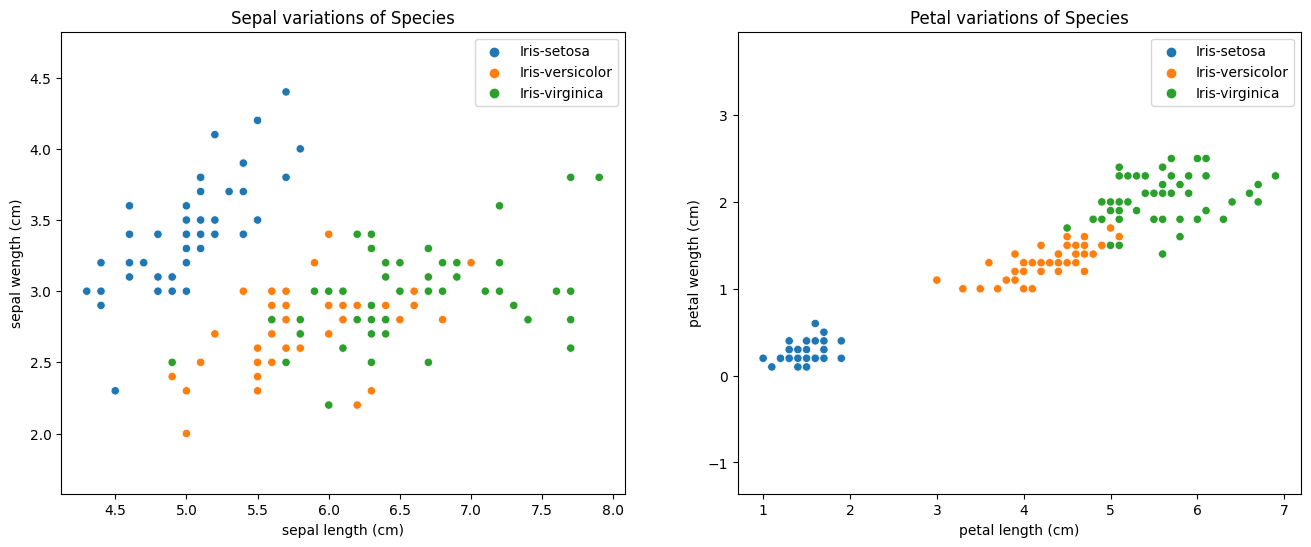

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(ax=ax1,
                data=iris_df,
                x='SepalLengthCm',
                y='SepalWidthCm',
                hue='Species')
ax1.set_title('Sepal variations of Species')
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('sepal wength (cm)')
ax1.axis('equal')
ax1.legend()
sns.scatterplot(ax=ax2,
                data=iris_df,
                x='PetalLengthCm',
                y='PetalWidthCm',
                hue='Species')
ax2.set_title('Petal variations of Species')
ax2.set_xlabel('petal length (cm)')
ax2.set_ylabel('petal wength (cm)')
ax2.axis('equal')
ax2.legend()
fig.show()

### 3.4.3 | Unveiling Feature Relationships in the Iris Dataset

* The pair plot displays a grid of scatter plots, showcasing the pairwise relationships between all the features in the Iris dataset.
* Each scatter plot compares two features, and the points are differentiated by species using different colors and markers.
* This plot provides a comprehensive view of how different features correlate with each other and how they can be used to distinguish the Iris species.
* It allows us to identify any strong correlations or patterns between the features and gain insights into the separability of the species based on different feature combinations.

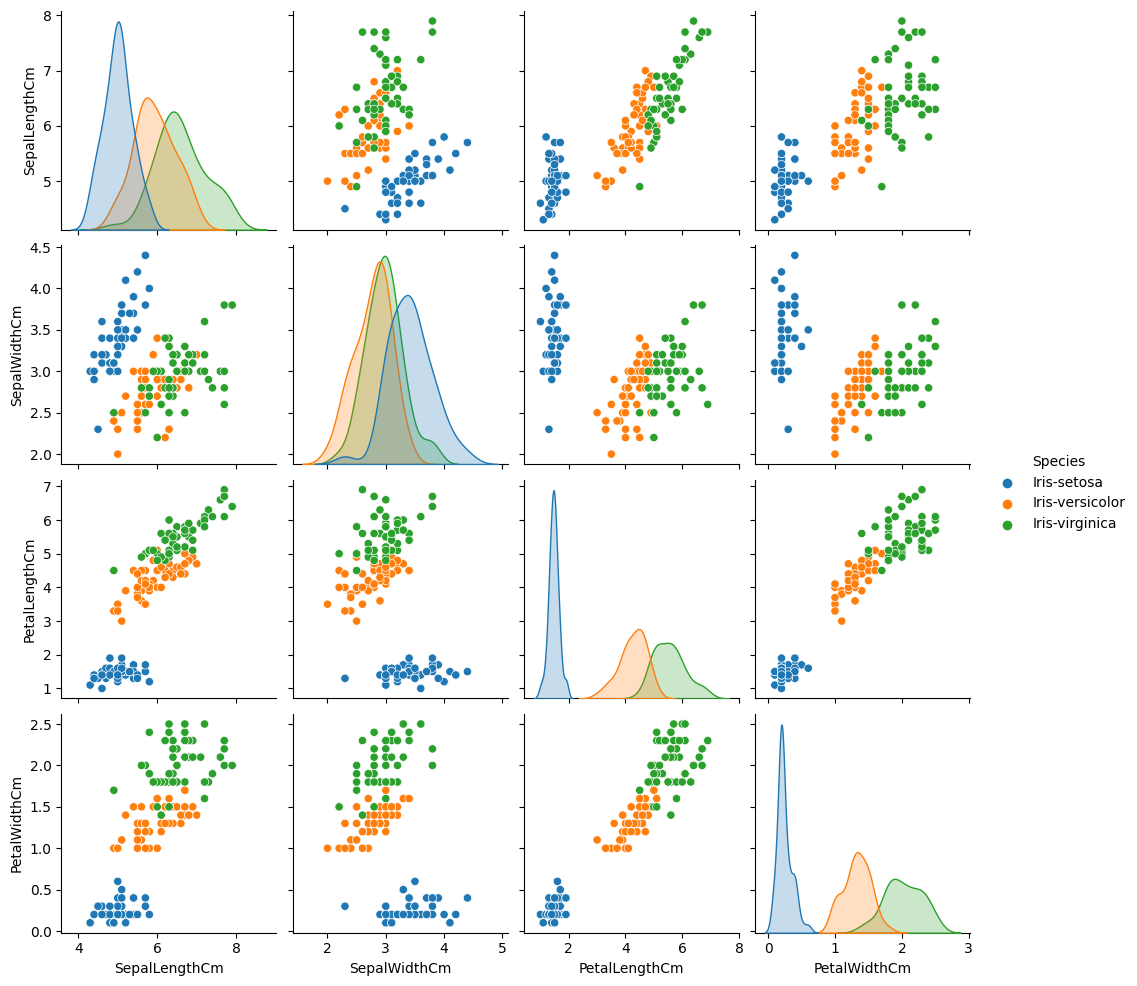

In [ ]:
g = sns.pairplot(iris_df, hue='Species', markers='o')
plt.show()

## 3.5 | Configuring Neural Network Model


Configuring a neural network model involves making decisions about various architectural aspects, such as the number and type of layers, activation functions, and optimization algorithms. It also entails setting hyperparameters like learning rate, batch size, and regularization. Proper configuration is crucial for achieving optimal performance and generalization in neural network models.

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from tqdm.auto import tqdm

### 3.5.1 | Model

* The `Iris_Net_Model` class represents a neural network model architecture specifically designed for the Iris dataset.
* The model consists of three fully connected layers (`layer1`, `layer2`, and `layer3`), which are defined in the constructor `__init__()`.
* The `forward()` method implements the forward pass of the model, where the input tensor x is sequentially passed through each layer.
* The rectified linear unit (ReLU) activation function (`F.relu()`) is applied between each layer to introduce non-linearity and enable the model to learn complex patterns.
* The output layer uses the softmax activation function (F.softmax()) to produce a probability distribution over the three classes (Iris species).
* The `dim=1` argument in `F.softmax()` specifies that the softmax operation is applied along the second dimension (class dimension) to ensure proper normalization.
* The model returns the output tensor x, representing the predicted probabilities for each class.
* The default values for the input dimensions, hidden units, and output dimensions are set to match the requirements of the Iris dataset, but they can be customized when creating an instance of the model.

In [ ]:
class Iris_Net_Model(nn.Module):
  """
  Neural network model for Iris dataset classification.

  Args:
      input_dim (int): Number of input features. Default is 4.
      hidden_units (int): Number of units in the hidden layers. Default is 50.
      output_dim (int): Number of output classes. Default is 3.
  """

  def __init__(self, input_dim=4, hidden_units=50, output_dim=3):
    super().__init__()

    # Define the layers of the neural network
    self.layer1 = nn.Linear(input_dim, hidden_units)
    self.layer2 = nn.Linear(hidden_units, hidden_units)
    self.layer3 = nn.Linear(hidden_units, output_dim)

  def forward(self, x):
    """
    Forward pass of the neural network.

    Args:
        x (torch.Tensor): Input tensor.

    Returns:
        torch.Tensor: Output tensor representing predicted class probabilities.
    """
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.softmax(F.relu(self.layer3(x)), dim=1)
    return x

## 3.6 | Train The Model

### 3.6.1 | Train Function

The train_step function performs a single training step on a neural network model.
* It takes as input the model, training data (`X_train`), corresponding labels (`y_train`), a loss function (`loss_fn`), and an optimizer (`optimizer`).
* The function puts the model in training mode using `model.train()` to enable the gradients to be computed during the forward and backward passes.
* It makes predictions using the model on the training data (`X_train`) by calling `model(X_train)`.
* The loss between the predicted and actual labels is calculated using the provided loss function (`loss_fn`).
* The scalar value of the loss is extracted using `loss.item()`.
* The accuracy of the model's predictions is computed using the accuracy function, passing in the predicted labels (y_pred), actual labels (`y_train`), and appropriate parameters for the task and number of classes.
* The gradients are reset to zero using `optimizer.zero_grad()` to prevent them from accumulating from previous batches.
* Backpropagation is performed by calling `loss.backward()` to compute the gradients of the loss with respect to the model's parameters.
* The optimizer's `step()` method is called to update the model's parameters based on the computed gradients.
* The function returns the training loss and accuracy as a tuple.

In [ ]:
def train_step(model: nn.Module,
               X_train: torch.Tensor,
               y_train: torch.Tensor,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer) -> Tuple[float, float]:
  """
  Performs a single training step on the neural network model.

  Args:
      model (nn.Module): The neural network model.
      X_train (TensorType["batch", "features"]): The training input data.
      y_train (TensorType["batch"]): The ground truth labels for the training data.
      loss_fn (_Loss): The loss function used to compute the loss between predicted and actual labels.
      optimizer (Optimizer): The optimizer used to update the model's parameters.

  Returns:
      Tuple[float, float]: The training loss and accuracy.

  """

  # Put the model in training mode
  model.train()

  # Initialize variables for training loss and accuracy
  train_loss, train_acc = 0, 0
  
  # Make predictions with the model
  y_pred = model(X_train)

  # Calculate the loss between predicted and actual labels
  loss = loss_fn(y_pred, y_train)

  # Extract the scalar value from the loss tensor
  train_loss = loss.item()

  # Calculate the accuracy of the model's predictions
  train_acc = accuracy(y_pred,
                       y_train,
                       task='multiclass',
                       num_classes=3).item()
  
  # Zero the gradients
  optimizer.zero_grad()

  # Backpropagate the gradients
  loss.backward()

  # Update the model's parameters
  optimizer.step()

  return train_loss, train_acc

### 3.6.2 | Test Function

This `test_step` function allows for evaluating the performance of a neural network model on a test dataset by calculating the loss and accuracy.

* The test_step function takes the following inputs:
  - `model`: An instance of a neural network model (`nn.Module`).
  - `X_test`: The test input data as a tensor (`torch.Tensor`).
  - `y_test`: The ground truth labels for the test data as a tensor (`torch.Tensor`).
  - `loss_fn`: The loss function used to compute the loss between predicted and actual labels (`nn.Module`).
  
* Before evaluation, the model is put into evaluation mode using `model.eval()` to disable gradient calculation and set the model to evaluation mode.

* The torch.inference_mode() context manager is used to optimize the model's performance during the inference phase.

* The model is then used to predict the labels for the test data by passing `X_test` through the model, resulting in the predicted labels stored in `y_pred`.

* The loss between the predicted labels (`y_pred`) and the ground truth labels (`y_test`) is calculated using the provided `loss_fn`.

* The computed loss value is stored in test_loss by calling loss.item() to extract the scalar value from the loss tensor.

* The accuracy of the model's predictions is calculated using the accuracy function, considering the `y_pred` and `y_test` tensors. It specifies that it is a multiclass task with 3 classes, and the resulting accuracy is stored in `test_acc` by calling `accuracy(...).item()`.

* Finally, the `test_loss` and `test_acc` values are returned as the output of the function.

In [ ]:
def test_step(model: nn.Module,
              X_test: torch.Tensor,
              y_test: torch.Tensor,
              loss_fn: nn.Module) -> Tuple[float, float]:
  """
  Evaluates the performance of a neural network model on a test dataset.

  Args:
      model (nn.Module): The neural network model.
      X_test (TensorType["batch", "features"]): The test input data.
      y_test (TensorType["batch"]): The ground truth labels for the test data.
      loss_fn (_Loss): The loss function used to compute the loss between predicted and actual labels.

  Returns:
      Tuple[float, float]: The test loss and accuracy.

  """
  # Put the model in evaluation mode
  model.eval()

  # Initialize variables for test loss and accuracy
  test_loss, test_acc = 0, 0

  # Use torch.inference_mode() for optimized inference
  with torch.inference_mode():

    # Make predictions with the model
    y_pred = model(X_test)

    # Calculate the loss between predicted and actual labels
    loss = loss_fn(y_pred, y_test)

    # Extract the scalar value from the loss tensor
    test_loss = loss.item()

    # Calculate the accuracy of the model's predictions
    test_acc = accuracy(y_pred,
                        y_test,
                        task='multiclass',
                        num_classes=3).item()

  return test_loss, test_acc

### 3.6.3 | Setting up Training Configuration and Device

* The number of training epochs is set to 500 using the variable EPOCHS.
* The DEVICE variable is assigned to "cuda" if a GPU is available; otherwise, it is set to "cpu". This allows the code to utilize GPU acceleration if possible.
* The training and test data (X_train, y_train, X_test, y_test) are moved to the designated device using the to() method. This ensures that the data is stored and processed on the specified device (CPU or GPU).
* An instance of the Iris_Net_Model class, named modelv0, is created with the appropriate input dimensions, hidden units, and output dimensions. The model is also moved to the designated device using the to() method.
* The loss function is set to nn.CrossEntropyLoss(), which is suitable for multi-class classification tasks.
* The optimizer is defined as torch.optim.Adam with the model's parameters (modelv0.parameters()) and a learning rate of 0.001.

These configurations set up the necessary components for training the neural network model. The model, loss function, optimizer, and device settings are established, preparing the code for the training loop.

In [ ]:
EPOCHS = 500
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

X_train, y_train = X_train.to(DEVICE), y_train.to(DEVICE)
X_test, y_test = X_test.to(DEVICE), y_test.to(DEVICE)

modelv0 = Iris_Net_Model(input_dim = X_train.shape[1],
                hidden_units = 50,
                output_dim = len(classes_to_idx)).to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelv0.parameters(),
                             lr = 0.001)

### 3.6.4 | Training Loop

* The loop iterates over the range of epochs using tqdm to display a progress bar.
* Inside the loop, the train_step function is called to perform a training step on the model using the training data. The returned training loss and accuracy are stored in variables train_loss and train_acc.
* The training metrics (loss and accuracy) for the current epoch are appended to the train_metrics list.
* The test_step function is called to evaluate the model on the test data. The returned test loss and accuracy are stored in variables test_loss and test_acc.
* The testing metrics (loss and accuracy) for the current epoch are appended to the test_metrics list.
* The printed information includes the current epoch, training loss, training accuracy, testing loss, and testing accuracy.

This code snippet demonstrates the training loop, tracks the training and testing metrics for each epoch, and provides periodic progress updates during training.

In [ ]:
train_metrics, test_metrics = [], []

for epoch in tqdm(range(EPOCHS)):
  train_loss, train_acc = train_step(model=modelv0,
                                     X_train=X_train,
                                     y_train=y_train,
                                     loss_fn=loss_fn,
                                     optimizer=optimizer)
  train_metrics.append([train_loss, train_acc])
  test_loss, test_acc = test_step(model=modelv0,
                                   X_test=X_test,
                                   y_test=y_test,
                                   loss_fn=loss_fn)
  test_metrics.append([test_loss, test_acc])
  
  if epoch % 20 == 0:
    if epoch == 0:
      print('\n')
    print(f"Epoch: {epoch:3} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

  0%|          | 0/500 [00:00<?, ?it/s]



Epoch:   0 | train loss: 1.0968 | train acc: 0.3167 | test loss: 1.0862 | test acc: 0.4000
Epoch:  20 | train loss: 0.9720 | train acc: 0.7667 | test loss: 0.9503 | test acc: 0.8000
Epoch:  40 | train loss: 0.8532 | train acc: 0.7750 | test loss: 0.8195 | test acc: 0.8000
Epoch:  60 | train loss: 0.7705 | train acc: 0.8250 | test loss: 0.7293 | test acc: 0.9000
Epoch:  80 | train loss: 0.7161 | train acc: 0.9083 | test loss: 0.6713 | test acc: 0.9667
Epoch: 100 | train loss: 0.6714 | train acc: 0.9417 | test loss: 0.6305 | test acc: 0.9667
Epoch: 120 | train loss: 0.6356 | train acc: 0.9500 | test loss: 0.6040 | test acc: 1.0000
Epoch: 140 | train loss: 0.6114 | train acc: 0.9667 | test loss: 0.5928 | test acc: 1.0000
Epoch: 160 | train loss: 0.5969 | train acc: 0.9750 | test loss: 0.5863 | test acc: 1.0000
Epoch: 180 | train loss: 0.5885 | train acc: 0.9750 | test loss: 0.5794 | test acc: 1.0000
Epoch: 200 | train loss: 0.5833 | train acc: 0.9750 | test loss: 0.5748 | test acc: 1.00

## 3.7 | Performance Visualization

### 3.7.1 | Plot preprocessing

* The training and testing metrics (train_metrics and test_metrics) are converted to NumPy arrays using np.array() for easier manipulation and indexing.
* Separate arrays (train_loss_arr, train_acc_arr, test_loss_arr, test_acc_arr) are created to store the specific metric values (loss and accuracy) from the arrays.
* A Pandas DataFrame, metrics_df, is created to organize the metric values with columns for epochs, training loss, training accuracy, testing loss, and testing accuracy.

In [ ]:
import numpy as np
train_metrics = np.array(train_metrics)
test_metrics = np.array(test_metrics)

In [ ]:
train_loss_arr = train_metrics[:, 0]
train_acc_arr = train_metrics[:, 1]
test_loss_arr = test_metrics[:, 0]
test_acc_arr = test_metrics[:, 1]

metrics_df = pd.DataFrame({
    'Epochs': range(EPOCHS),
    'Train Loss': train_metrics[:, 0],
    'Train Acc': train_metrics[:, 1],
    'Test Loss': test_metrics[:, 0],
    'Test Acc': test_metrics[:, 1]
})

metrics_df.head()

,Epochs,Train Loss,Train Acc,Test Loss,Test Acc
0,0,1.096771,0.316667,1.086187,0.400000
1,1,1.089086,0.366667,1.077889,0.466667
2,2,1.081402,0.483333,1.069823,0.600000
3,3,1.073867,0.608333,1.062026,0.700000
4,4,1.066540,0.650000,1.054261,0.700000


### 3.7.2 | Plotting Loss and Accuracy

* The first subplot (ax1) displays two line plots using sns.lineplot() to compare the training loss ('Train Loss') and testing loss ('Test Loss') over the epochs.
* The title, x-axis label, and y-axis label are set for the first subplot.
* The second subplot (ax2) displays two line plots using sns.lineplot() to compare the training accuracy ('Train Acc') and testing accuracy ('Test Acc') over the epochs.
The title, x-axis label, and y-axis label are set for the second subplot.
* The figure is displayed using fig.show().

This generates line plots that provide a visual comparison of the training and testing loss as well as the training and testing accuracy over the epochs.

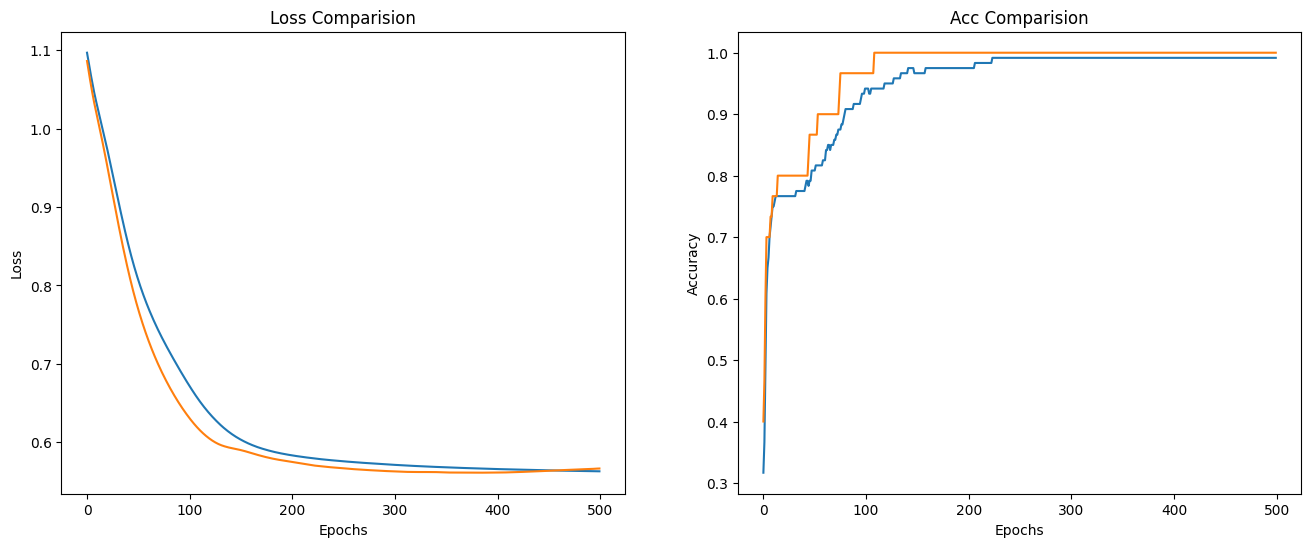

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(ax=ax1,
             data=metrics_df,
             x='Epochs',
             y='Train Loss')
sns.lineplot(ax=ax1,
             data=metrics_df,
             x='Epochs',
             y='Test Loss')
ax1.set_title('Loss Comparision')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
sns.lineplot(ax=ax2,
             data=metrics_df,
             x='Epochs',
             y='Train Acc')
sns.lineplot(ax=ax2,
             data=metrics_df,
             x='Epochs',
             y='Test Acc')
ax2.set_title('Acc Comparision')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
fig.show()

## 3.8 | Manual Testing

### 3.8.1 | Predicting a Data Sample 

* Extract a data sample and its corresponding label as `train_data_0` and `y_train_0`. The extracted label is *Iris-virginica*
* The extracted training data sample and its corresponding label are used to make a prediction using the trained model `modelv0` in evaluation mode. The prediction is stored in `y_pred_0`.
* The predicted class index is obtained by finding the index of the maximum value in the predicted output tensor `y_pred_0`. The corresponding class label is retrieved using the `classes_to_idx` dictionary. The predicted output is *Iris-virginica*.

In [ ]:
train_data_0, y_train_0 = X_train[10], y_train[10]
train_data_0, classes_to_idx[y_train_0.item()]

(tensor([-0.0525, -0.8192,  0.7628,  0.9221]), 'Iris-virginica')

In [ ]:
modelv0.eval()
with torch.inference_mode():
  y_pred_0 = modelv0(train_data_0.reshape(1, train_data_0.shape[0]))

In [ ]:
classes_to_idx[torch.argmax(y_pred_0).item()]

'Iris-virginica'

## 3.9 | Saving Model State

In [ ]:
torch.save(modelv0.state_dict(), '/content/drive/MyDrive/Models/IRIS/nn3_500.pth')